1. Max pooling forward and backward passes have been included in the layers.py file.
2. Several convenience layers like convolution-activation function-pool forward pass have been defined in the layer_utils.py file.
3. Spatial batchnorm layers have been implemented in the layers.py file.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from cnn import *
from data_utils import get_CIFAR10_data
from layer_utils import *
from layers import *
from solver import Solver

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [131]:
# Load the (preprocessed) CIFAR10 data.
DIR_CS231n = 'C:\Users\Hope\Neural Nets 682\Project\assignment2'
data = get_CIFAR10_data()
for k, v in data.iteritems():
  print '%s: ' % k, v.shape

X_val:  (1000L, 3L, 32L, 32L)
X_train:  (49000L, 3L, 32L, 32L)
X_test:  (1000L, 3L, 32L, 32L)
y_val:  (1000L,)
y_train:  (49000L,)
y_test:  (1000L,)


## Convolution architecture: [conv-relu-pool2x2]x3 - [affine - act func]x2 - affine - softmax

### ReLu activation function

In [153]:
model_10amx = FirstConvNet(act_func='relu',weight_scale=0.01,num_filters=[16, 16, 16],hidden_dims=[100,100],reg=0.01,filter_size = 3,use_batchnorm=True)

solver_10amx = Solver(model_10amx, data,
                num_epochs=5, batch_size=128,
                update_rule='adam',
                optim_config={
                  'learning_rate': 1e-2,
                },
                verbose=True, print_every=100)

t = time.time()
solver_10amx.train()


y_test_pred = np.argmax(model_10amx.loss(X_test), axis=1)
y_val_pred = np.argmax(model_10amx.loss(X_val), axis=1)
print 'Validation set accuracy: ', (y_val_pred == y_val).mean()
print 'Test set accuracy: ', (y_test_pred == y_test).mean()

(Iteration 1 / 1910) loss: 2.319285
(Epoch 0 / 5) train acc: 0.106000; val_acc: 0.079000
(Iteration 101 / 1910) loss: 1.875568
(Iteration 201 / 1910) loss: 1.665941
(Iteration 301 / 1910) loss: 1.773125
(Epoch 1 / 5) train acc: 0.529000; val_acc: 0.521000
(Iteration 401 / 1910) loss: 1.641751
(Iteration 501 / 1910) loss: 1.610038
(Iteration 601 / 1910) loss: 1.485977
(Iteration 701 / 1910) loss: 1.611240
(Epoch 2 / 5) train acc: 0.570000; val_acc: 0.560000
(Iteration 801 / 1910) loss: 1.565801
(Iteration 901 / 1910) loss: 1.544828
(Iteration 1001 / 1910) loss: 1.469505
(Iteration 1101 / 1910) loss: 1.463467
(Epoch 3 / 5) train acc: 0.590000; val_acc: 0.627000
(Iteration 1201 / 1910) loss: 1.574644
(Iteration 1301 / 1910) loss: 1.420624
(Iteration 1401 / 1910) loss: 1.398904
(Iteration 1501 / 1910) loss: 1.344931
(Epoch 4 / 5) train acc: 0.612000; val_acc: 0.618000
(Iteration 1601 / 1910) loss: 1.199835
(Iteration 1701 / 1910) loss: 1.427981
(Iteration 1801 / 1910) loss: 1.311495
(Itera

### Leaky ReLu activation function

In [144]:
model_10d = FirstConvNet(act_func='leakyrelu',weight_scale=0.04,num_filters=[16, 16, 16],hidden_dims=[300,200],reg=0.001,filter_size = 3,use_batchnorm=True)

solver_10d = Solver(model_10d, data,
                num_epochs=5, batch_size=128,
                update_rule='adam',
                optim_config={
                  'learning_rate': 5e-3,
                },
                verbose=True, print_every=100)

solver_10d.train()

y_test_pred = np.argmax(model_10d.loss(X_test), axis=1)
y_val_pred = np.argmax(model_10d.loss(X_val), axis=1)
print 'Validation set accuracy: ', (y_val_pred == y_val).mean()
print 'Test set accuracy: ', (y_test_pred == y_test).mean()


(Iteration 1 / 1910) loss: 2.532463
(Epoch 0 / 5) train acc: 0.182000; val_acc: 0.173000
(Iteration 101 / 1910) loss: 1.403088
(Iteration 201 / 1910) loss: 1.356229
(Iteration 301 / 1910) loss: 1.098953
(Epoch 1 / 5) train acc: 0.609000; val_acc: 0.598000
(Iteration 401 / 1910) loss: 1.292859
(Iteration 501 / 1910) loss: 1.258159
(Iteration 601 / 1910) loss: 1.098815
(Iteration 701 / 1910) loss: 1.138083
(Epoch 2 / 5) train acc: 0.650000; val_acc: 0.645000
(Iteration 801 / 1910) loss: 1.281670
(Iteration 901 / 1910) loss: 0.971094
(Iteration 1001 / 1910) loss: 1.263521
(Iteration 1101 / 1910) loss: 1.028085
(Epoch 3 / 5) train acc: 0.684000; val_acc: 0.672000
(Iteration 1201 / 1910) loss: 1.033920
(Iteration 1301 / 1910) loss: 1.072402
(Iteration 1401 / 1910) loss: 1.089330
(Iteration 1501 / 1910) loss: 1.105920
(Epoch 4 / 5) train acc: 0.725000; val_acc: 0.706000
(Iteration 1601 / 1910) loss: 0.951390
(Iteration 1701 / 1910) loss: 0.788645
(Iteration 1801 / 1910) loss: 1.160713
(Itera

### Softplus activation function

In [148]:
import time
model_10g = FirstConvNet(act_func='softplus',weight_scale=0.04,num_filters=[16, 16, 16],hidden_dims=[300,200],reg=0.001,filter_size = 3,use_batchnorm=True)

solver_10g = Solver(model_10g, data,
                num_epochs=5, batch_size=128,
                update_rule='adam',
                optim_config={
                  'learning_rate': 5e-3 #3e-2,
                },
                verbose=True, print_every=100)


solver_10g.train()

y_test_pred = np.argmax(model_10g.loss(X_test), axis=1)
y_val_pred = np.argmax(model_10g.loss(X_val), axis=1)
print 'Validation set accuracy: ', (y_val_pred == y_val).mean()
print 'Test set accuracy: ', (y_test_pred == y_test).mean()


(Iteration 1 / 1910) loss: 2.530162
(Epoch 0 / 5) train acc: 0.226000; val_acc: 0.206000
(Iteration 101 / 1910) loss: 1.417335
(Iteration 201 / 1910) loss: 1.424260
(Iteration 301 / 1910) loss: 1.489977
(Epoch 1 / 5) train acc: 0.573000; val_acc: 0.604000
(Iteration 401 / 1910) loss: 1.299333
(Iteration 501 / 1910) loss: 1.197796
(Iteration 601 / 1910) loss: 1.141136
(Iteration 701 / 1910) loss: 1.101401
(Epoch 2 / 5) train acc: 0.634000; val_acc: 0.627000
(Iteration 801 / 1910) loss: 1.197391
(Iteration 901 / 1910) loss: 1.113790
(Iteration 1001 / 1910) loss: 1.190823
(Iteration 1101 / 1910) loss: 1.125359
(Epoch 3 / 5) train acc: 0.669000; val_acc: 0.658000
(Iteration 1201 / 1910) loss: 1.115657
(Iteration 1301 / 1910) loss: 1.067922
(Iteration 1401 / 1910) loss: 0.962680
(Iteration 1501 / 1910) loss: 1.158390
(Epoch 4 / 5) train acc: 0.685000; val_acc: 0.665000
(Iteration 1601 / 1910) loss: 1.104283
(Iteration 1701 / 1910) loss: 1.019385
(Iteration 1801 / 1910) loss: 0.926252
(Itera

### ELu activation function

In [ ]:
model_10h = FirstConvNet(act_func='elu',weight_scale=0.04,num_filters=[16, 16, 16],hidden_dims=[300,200],reg=0.001,filter_size = 3,use_batchnorm=True)

solver_10h = Solver(model_10g, data,
                num_epochs=5, batch_size=128,
                update_rule='adam',
                optim_config={
                  'learning_rate': 5e-3 #3e-2,
                },
                verbose=True, print_every=100)


solver_10h.train()

y_test_pred = np.argmax(model_10g.loss(X_test), axis=1)
y_val_pred = np.argmax(model_10g.loss(X_val), axis=1)
print 'Validation set accuracy: ', (y_val_pred == y_val).mean()
print 'Test set accuracy: ', (y_test_pred == y_test).mean()

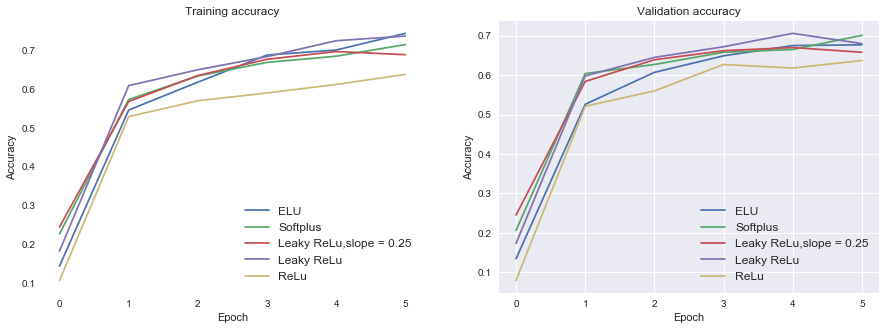

In [243]:
import matplotlib.pyplot as pl
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'


pl.subplot(1,2,1,facecolor='w')

pl.title('Training accuracy')
pl.xlabel('Epoch')
pl.ylabel('Accuracy')

pl.plot(solver_10h.train_acc_history, label='ELU')
pl.plot(solver_10g.train_acc_history,  label='Softplus')
pl.plot(solver_10f.train_acc_history,  label='Leaky ReLu,slope = 0.25')
pl.plot(solver_10d.train_acc_history,  label='Leaky ReLu')
pl.plot(solver_10amx.train_acc_history,  label='ReLu')



pl.legend(loc='lower right',prop={'size': 12})
matplotlib.rcParams.update({'font.size': 15})


pl.subplot(1,2,2)
pl.title('Validation accuracy')
pl.xlabel('Epoch')
pl.ylabel('Accuracy')

pl.plot(conv_elu_val, label='ELU')
pl.plot(solver_10g.val_acc_history,  label='Softplus')
pl.plot(solver_10f.val_acc_history,  label='Leaky ReLu,slope = 0.25')
pl.plot(solver_10d.val_acc_history,  label='Leaky ReLu')
pl.plot(solver_10amx.val_acc_history,  label='ReLu')

pl.legend(loc='lower right',prop={'size': 12})

matplotlib.rcParams.update({'font.size': 15})


pl.gcf().set_size_inches(15, 5)
pl.show()